In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import scale

In [2]:
csv_in = 'df_fa.csv'

%config InlineBackend.figure_formats = {'png', 'retina'}  # for high-reso graph

pd.set_option("display.max_colwidth", 200)

In [3]:
df = pd.read_csv(csv_in, sep=' ', skiprows=0, header=0,encoding="shift-jis")
df=df.reset_index()
df=df.iloc[:,1:]
print(df.shape)
print(df.info())
display(df.head())

(250, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      250 non-null    float64
 1   X2      250 non-null    float64
 2   X3      250 non-null    float64
 3   X4      250 non-null    float64
 4   X5      250 non-null    float64
dtypes: float64(5)
memory usage: 9.9 KB
None


,X1,X2,X3,X4,X5
0,-0.351951,-1.427971,-0.319138,-0.617654,-1.001495
1,-0.249108,0.573213,1.052384,0.044110,0.131287
2,1.506190,0.594547,2.405211,1.466074,0.874755
3,1.002827,0.594572,0.474678,2.037321,1.052607
4,-1.878186,0.629297,0.518662,-0.449310,-0.185656


In [4]:
df=pd.DataFrame(scale(df),columns=df.columns.values)

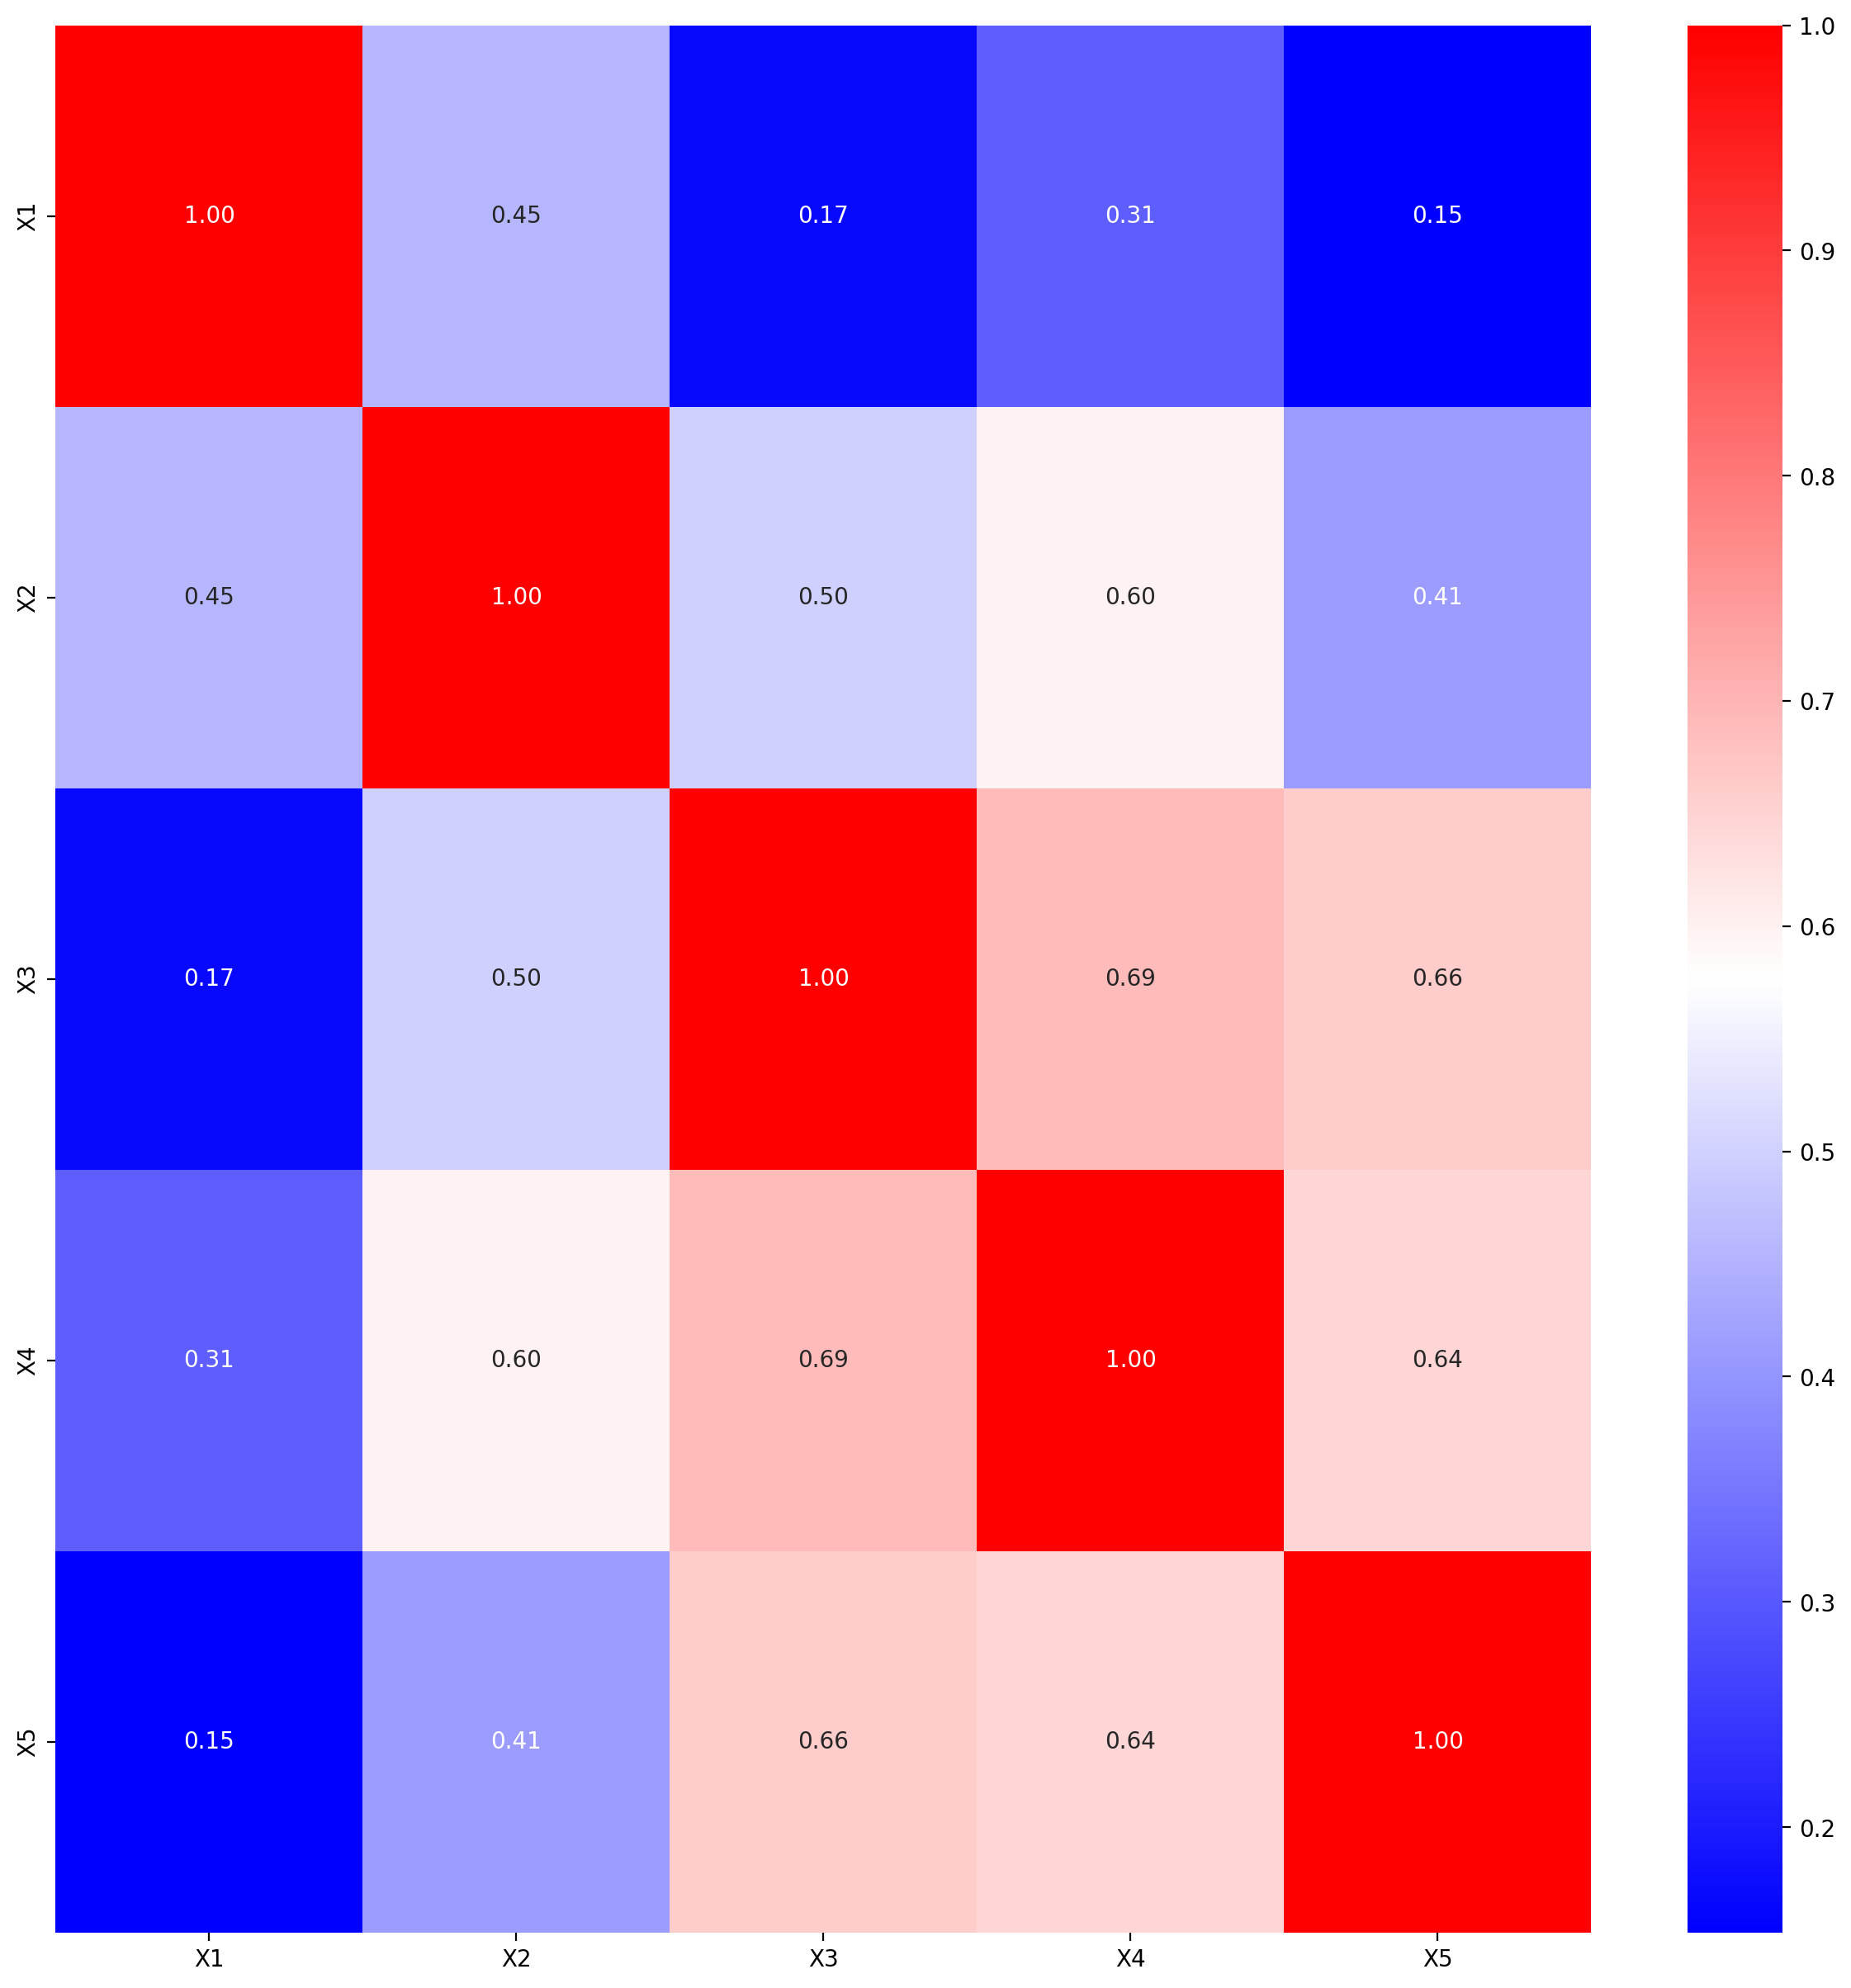

In [5]:
df_corr = df.corr(method='pearson')
plt.figure(figsize=(15,15))
sns.heatmap(df_corr,annot=True,fmt='.2f',cmap='bwr')
plt.show()

In [7]:
import numpy.linalg as LA
import scipy as sp
df_corr_b = np.array(df_corr)

from scipy import linalg 
print(linalg.eigvals(df_corr_b))

[2.91457415+0.j 1.01607744+0.j 0.45734029+0.j 0.32426958+0.j
 0.28773855+0.j]


In [8]:
fa = FactorAnalyzer(n_factors=2, rotation='promax', method='ml')
fa.fit(df.values)

FactorAnalyzer(method='ml', n_factors=2, rotation_kwargs={})

In [9]:
eigen_org, eigen_cf = fa.get_eigenvalues()
ser_eigen_org = pd.Series(eigen_org)
ser_eigen_cf = pd.Series(eigen_cf)
print(ser_eigen_org)
print(ser_eigen_cf)

0    2.914574
1    1.016077
2    0.457340
3    0.324270
4    0.287739
dtype: float64
0    2.541349
1    0.562690
2    0.091397
3   -0.044140
4   -0.144004
dtype: float64


#### Scree plot (スクリープロット)  

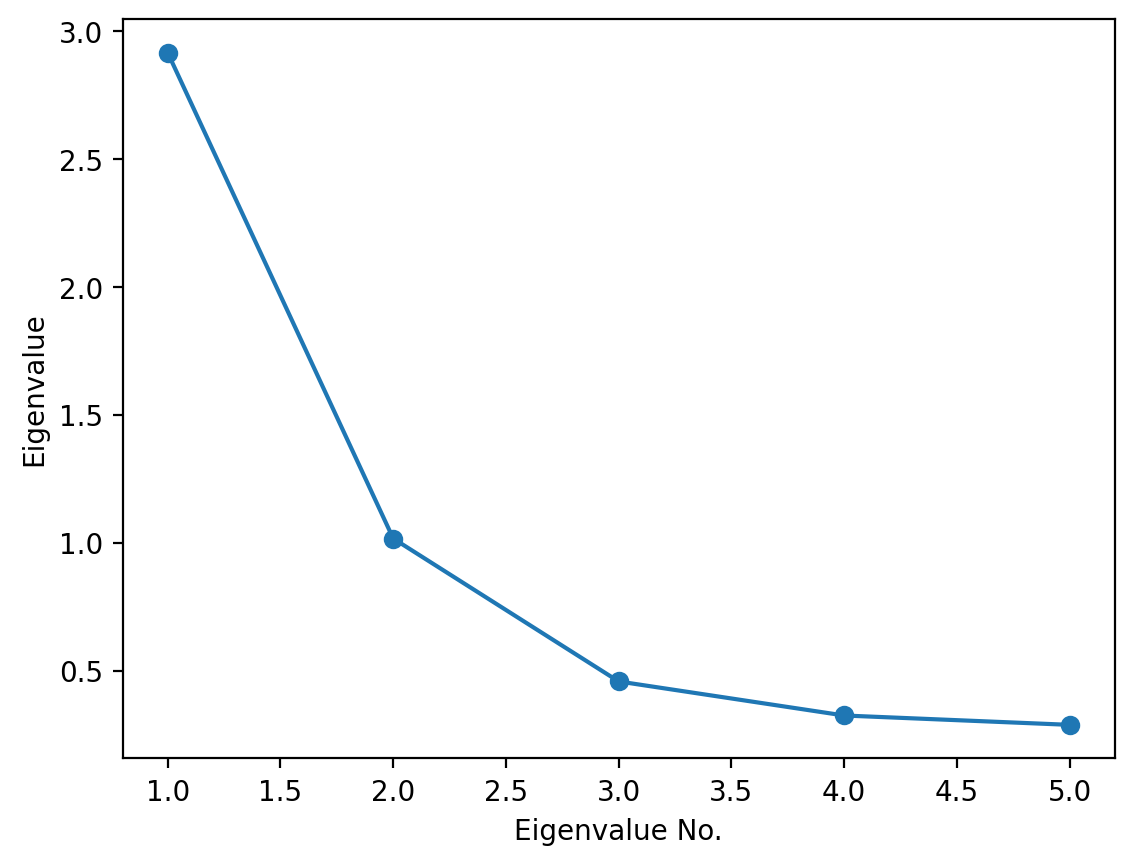

In [10]:
x = np.array(range(len(ser_eigen_org)))+1
plt.plot(x, ser_eigen_org, marker='o')
plt.xlabel('Eigenvalue No.')
plt.ylabel('Eigenvalue')
plt.show()

#### Loadings (因子負荷量)  

In [11]:
loadings = fa.loadings_
df_loadings = pd.DataFrame(loadings, index=df.columns,
                           columns=['Factor1','Factor2'])
display(df_loadings)

,Factor1,Factor2
X1,-0.126173,0.687028
X2,0.266867,0.628727
X3,0.866969,-0.052505
X4,0.722596,0.208051
X5,0.848208,-0.116483


#### Scores (因子得点)  

In [12]:
scores = fa.transform(df)
df_scores = pd.DataFrame(scores, columns=['Factor1','Factor2'])
print(df_scores.shape)
display(df_scores.head())

(250, 2)


,Factor1,Factor2
0,-1.681382,-1.204689
1,-0.369209,-0.061597
2,0.769707,0.426562
3,0.390391,0.497116
4,-0.793258,-0.336252


#### Uniquenesses (独自因子の割合)  

In [13]:
uniqueness = fa.get_uniquenesses()
ser_uniqueness = pd.Series(uniqueness, index=df.columns)
print(ser_uniqueness)

X1    0.512072
X2    0.533484
X3    0.245608
X4    0.434570
X5    0.266974
dtype: float64


In [14]:
fa_var = fa.get_factor_variance()
df_fa_var = pd.DataFrame(fa_var,
                         index=['var', 'prop_var', 'cum_var'],
                         columns=['Factor1','Factor2'])
display(df_fa_var)

,Factor1,Factor2
var,2.080375,0.926916
prop_var,0.416075,0.185383
cum_var,0.416075,0.601458


#### biplot 

In [15]:
def biplot_fa(score_2d, loadings, load_labels=None):
    plt.figure(figsize=(10,10))
    r1 = 1.5
    r2 = 1.5
    if load_labels is None:
        load_labels = range(len(loadings))
    for i, coef in enumerate(loadings):
        plt.arrow(0, 0, coef[0]*r1, coef[1]*r1, color='r')    
        plt.text(coef[0]*r1*r2, coef[1]*r1*r2, load_labels[i],
                 color='b', fontsize=10)
    for i in range(len(score_2d)):
        m = '${}$'.format(i)
        plt.scatter(score_2d[i,0], score_2d[i,1], marker=m, s=500, c='k')
    plt.xlabel('F_1')
    plt.ylabel('F_2')
    plt.grid()
    return None

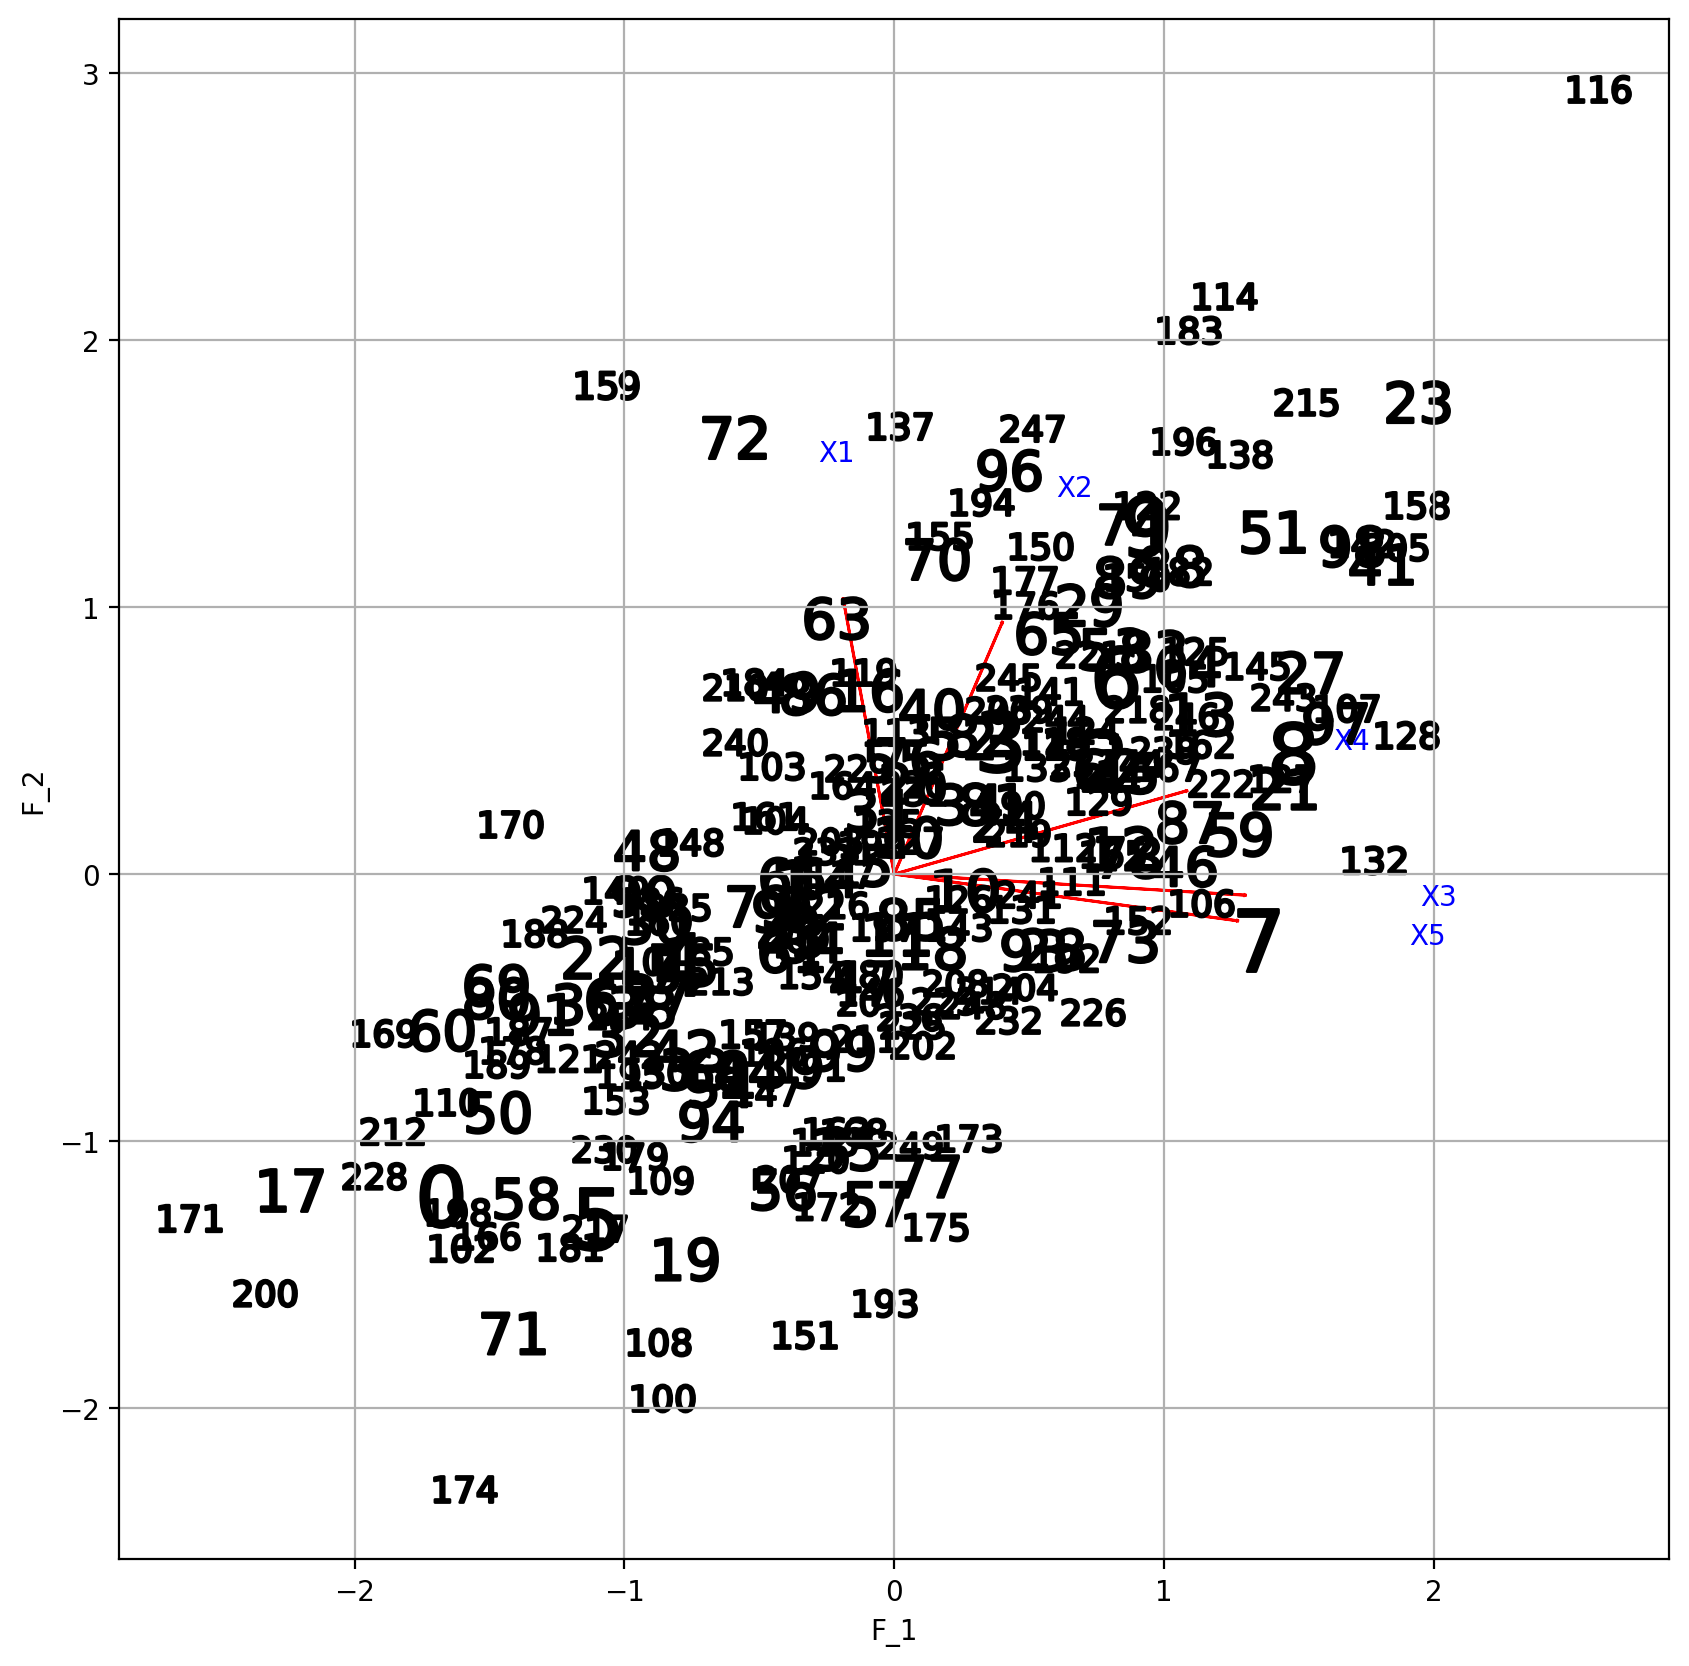

In [16]:
biplot_fa(scores, loadings, load_labels=df.columns)

In [17]:
results = []
for i in range(1, 3):
    col_name = "Factor{}".format(i)
    variables = df_loadings[col_name].abs().sort_values(ascending=False)[:3].index
    results.append([col_name, ",".join(variables)])

# Dataframe 
df_results = pd.DataFrame(results, columns=["Factor", "Top 3 Variables"])
display(df_results)

,Factor,Top 3 Variables
0,Factor1,"X3,X5,X4"
1,Factor2,"X1,X2,X4"
